In [1]:
import os

curr_dir = os.path.split(os.getcwd())[1]
if curr_dir != "irl-environment-design":
    os.chdir("..")

In [2]:
import numpy as np

from src.utils.make_environment import (
    transition_matrix,
    Environment,
    insert_walls_into_T,
)

from src.utils.constants import ParamTuple

np.set_printoptions(linewidth=160, precision=2)

from src.utils.environment_design import EnvironmentDesign

from src.utils.inference.posterior import PosteriorInference

/home/paul/.local/lib/python3.10/site-packages/numba/core/decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


### Create Environment

In [11]:
# 0. Setup
## 0.2 Setup the environment
N, M = 7,7

# TODO describe world
agent_R = np.zeros((N, M))
agent_R[N-1, 0] = 1
agent_R[N-1, M-1] = 3



# Start by making the agent we want to learn the policy of
agent_p = 0.7
agent_gamma = 0.9
p_true=0.7

agent_R = agent_R.flatten()
goal_states = np.where(agent_R != 0)[0]

true_params = ParamTuple(agent_p, agent_gamma, agent_R)

wall_states = [14]

T_true = transition_matrix(N, M, p=p_true, absorbing_states=goal_states)
T_True = insert_walls_into_T(T=T_true, wall_indices=wall_states)

big_small = Environment(
    N=N,
    M=M,
    T_true=T_true,
    wall_states=wall_states,
    R_true=agent_R,
    start_state=0,
    n_walls=None,
    goal_states=goal_states
)

### Environment Design

In [12]:
env_design = EnvironmentDesign(base_environment=big_small, user_params=true_params, learn_what = "gamma, T")

In [13]:
candidate_environments_args = {}
# candidate_environments_args["n_environments"] = 50
candidate_environments_args["generate_how"] = "entropy_BM"
# candidate_environments_args["n_walls"] = 5


env_design.run_n_episodes(n_episodes=15,
                          candidate_environments_args=candidate_environments_args)

# env_design.save("big_small")

Started episode 0.
Finished episode 0.
Started episode 1.
Started computing Posterior.


0it [00:00, ?it/s]

12it [00:00, 16.18it/s]


current_belief: [[-2.12 -2.11 -2.09 -2.06 -2.03 -1.98 -1.91 -1.81 -1.7  -1.6  -1.54 -1.57]
 [-2.08 -2.06 -2.04 -2.01 -1.96 -1.9  -1.81 -1.71 -1.61 -1.53 -1.49 -1.55]
 [-2.05 -2.03 -2.   -1.96 -1.9  -1.82 -1.72 -1.62 -1.54 -1.48 -1.46 -1.54]
 [-2.02 -2.   -1.96 -1.91 -1.84 -1.75 -1.65 -1.56 -1.49 -1.43 -1.44 -1.52]
 [-2.   -1.97 -1.92 -1.86 -1.78 -1.68 -1.59 -1.51 -1.45 -1.41 -1.42 -1.5 ]
 [-1.98 -1.94 -1.89 -1.81 -1.73 -1.64 -1.55 -1.48 -1.43 -1.39 -1.41 -1.48]
 [-1.97 -1.92 -1.86 -1.78 -1.69 -1.6  -1.53 -1.47 -1.41 -1.39 -1.4  -1.47]
 [-1.97 -1.91 -1.84 -1.76 -1.67 -1.59 -1.53 -1.47 -1.41 -1.4  -1.41 -1.46]
 [-1.98 -1.91 -1.83 -1.75 -1.67 -1.6  -1.54 -1.48 -1.44 -1.42 -1.43 -1.47]
 [-2.   -1.93 -1.85 -1.77 -1.69 -1.64 -1.58 -1.51 -1.48 -1.47 -1.48 -1.5 ]
 [-2.05 -1.98 -1.9  -1.82 -1.76 -1.71 -1.65 -1.6  -1.58 -1.56 -1.56 -1.56]
 [-2.18 -2.1  -2.02 -1.95 -1.9  -1.85 -1.8  -1.76 -1.75 -1.74 -1.73 -1.72]]
Finished computing Posterior.
Mean Parameters: ParamTuple(p=0.7281312492785693, gam

12it [00:01,  6.59it/s]


current_belief: [[ -inf  -inf  -inf  -inf  -inf  -inf  -inf -3.39 -3.15 -2.9  -2.7  -2.63]
 [ -inf  -inf  -inf  -inf  -inf -3.56 -3.39 -3.18 -2.94 -2.72 -2.56 -2.56]
 [ -inf  -inf  -inf  -inf -3.56 -3.4  -3.21 -2.99 -2.76 -2.57 -2.48 -2.52]
 [ -inf  -inf  -inf  -inf -3.43 -3.26 -3.06 -2.84 -2.63 -2.47 -2.41 -2.47]
 [ -inf  -inf  -inf -3.47 -3.32 -3.14 -2.93 -2.72 -2.53 -2.4  -2.37 -2.43]
 [ -inf  -inf -3.52 -3.39 -3.22 -3.04 -2.83 -2.63 -2.46 -2.36 -2.35 -2.39]
 [ -inf  -inf -3.47 -3.32 -3.16 -2.97 -2.76 -2.57 -2.42 -2.35 -2.34 -2.38]
 [ -inf  -inf -3.44 -3.28 -3.12 -2.93 -2.72 -2.55 -2.42 -2.37 -2.35 -2.38]
 [ -inf  -inf -3.43 -3.28 -3.12 -2.92 -2.73 -2.56 -2.46 -2.42 -2.4  -2.41]
 [ -inf  -inf -3.47 -3.32 -3.15 -2.96 -2.78 -2.63 -2.56 -2.52 -2.49 -2.49]
 [ -inf  -inf -3.57 -3.43 -3.26 -3.07 -2.91 -2.79 -2.74 -2.7  -2.66 -2.63]
 [ -inf  -inf  -inf  -inf -3.5  -3.32 -3.18 -3.1  -3.08 -3.05 -3.02 -2.98]]
Finished computing Posterior.
Mean Parameters: ParamTuple(p=0.7394684841864231, gam

12it [00:02,  4.69it/s]


current_belief: [[ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -4.37 -4.03 -3.91]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -4.45 -4.09 -3.83 -3.8 ]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf -4.55 -4.19 -3.87 -3.7  -3.72]
 [ -inf  -inf  -inf  -inf  -inf  -inf -4.67 -4.33 -3.98 -3.7  -3.6  -3.65]
 [ -inf  -inf  -inf  -inf  -inf  -inf -4.5  -4.15 -3.82 -3.6  -3.54 -3.59]
 [ -inf  -inf  -inf  -inf  -inf -4.67 -4.35 -4.01 -3.71 -3.54 -3.5  -3.54]
 [ -inf  -inf  -inf  -inf  -inf -4.58 -4.24 -3.92 -3.64 -3.52 -3.49 -3.52]
 [ -inf  -inf  -inf  -inf  -inf -4.52 -4.18 -3.87 -3.63 -3.54 -3.51 -3.53]
 [ -inf  -inf  -inf  -inf  -inf -4.5  -4.18 -3.88 -3.69 -3.62 -3.58 -3.59]
 [ -inf  -inf  -inf  -inf  -inf -4.55 -4.25 -3.96 -3.82 -3.76 -3.72 -3.7 ]
 [ -inf  -inf  -inf  -inf  -inf -4.7  -4.42 -4.17 -4.08 -4.03 -3.97 -3.93]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -4.56 -4.53 -4.49 -4.44]]
Finished computing Posterior.
Mean Parameters: ParamTuple(p=0.7372876001985518, gam

12it [00:02,  4.69it/s]


current_belief: [[ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -4.84 -4.65]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -4.91 -4.53 -4.48]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -4.56 -4.33 -4.34]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -4.71 -4.31 -4.17 -4.22]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf -4.96 -4.44 -4.14 -4.06 -4.11]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf -4.69 -4.24 -4.03 -3.98 -4.02]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf -4.48 -4.11 -3.97 -3.93 -3.96]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf -4.36 -4.05 -3.96 -3.92 -3.94]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf -4.31 -4.08 -4.   -3.97 -3.97]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf -4.35 -4.19 -4.13 -4.08 -4.07]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf -4.54 -4.44 -4.38 -4.33 -4.29]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]]
Finished computing Posterior.
Mean Parameters: ParamTuple(p=0.7438236199333182, gam

12it [00:02,  5.44it/s]


current_belief: [[ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -5.84 -5.93]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -5.79 -5.69 -5.81]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -5.62 -5.57 -5.71]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -5.73 -5.52 -5.5  -5.62]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -5.6  -5.47 -5.47 -5.57]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf -5.9  -5.57 -5.48 -5.48 -5.56]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf -5.88 -5.63 -5.56 -5.55 -5.61]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf -5.97 -5.8  -5.74 -5.72 -5.74]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -6.1  -6.05 -6.04]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]]
Finished computing Posterior.
Mean Parameters: ParamTuple(p=0.7600305472330796, gam

12it [00:02,  5.89it/s]


current_belief: [[ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -7.24 -7.08 -7.18]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -7.04 -6.95 -7.05]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -7.21 -6.92 -6.87 -6.96]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -7.04 -6.87 -6.84 -6.91]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -7.01 -6.89 -6.87 -6.92]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -7.09 -7.   -6.97 -7.  ]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -7.31 -7.24 -7.19 -7.19]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]]
Finished computing Posterior.
Mean Parameters: ParamTuple(p=0.7519946983107034, gam

12it [00:01,  6.83it/s]


current_belief: [[ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -8.87 -9.08]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -8.8  -8.75 -8.96]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -8.7  -8.68 -8.87]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -8.84 -8.68 -8.68 -8.82]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -8.85 -8.73 -8.74 -8.85]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -9.   -8.91 -8.9  -8.97]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]]
Finished computing Posterior.
Mean Parameters: ParamTuple(p=0.7390049900616991, gam

12it [00:01,  8.92it/s]


current_belief: [[ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -9.5   -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -9.35 -9.34  -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -9.2  -9.23 -9.46]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -9.38 -9.15 -9.16 -9.36]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -9.29 -9.18 -9.18 -9.33]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf -9.32 -9.3   -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]
 [ -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf  -inf]]
Finished computing Posterior.
Mean Parameters: ParamTuple(p=0.7427091175423464, gam

12it [00:01, 10.66it/s]


current_belief: [[  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -10.06 -10.09   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf  -9.88  -9.93   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf  -9.8   -9.83 -10.06]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf  -9.92  -9.83  -9.82  -9.99]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf  -9.96  -9.91   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -i

12it [00:01, 11.87it/s]


current_belief: [[  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -11.19 -11.25   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -11.12 -11.15   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -11.26 -11.15 -11.15 -11.33]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -11.29 -11.26   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -i

12it [00:00, 14.62it/s]


current_belief: [[  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -12.31 -12.49   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -12.28 -12.42   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -12.47 -12.35 -12.42   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -12.56   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -i

12it [00:00, 15.66it/s]


current_belief: [[  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -13.58 -13.87   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -13.58 -13.9    -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -13.82 -13.73 -14.03   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -i

12it [00:00, 15.61it/s]


current_belief: [[  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -14.79 -15.27   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -14.87 -15.43   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -15.1  -15.12   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -i

12it [00:00, 19.51it/s]


current_belief: [[  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -15.72 -16.18   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -15.8    -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf -16.08 -16.06   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf   -inf]
 [  -inf   -inf   -inf   -i

### Inference - load observations and initialize posterior inference class.

In [6]:
import pickle

experiment_1_path = os.path.join("checkpoints", "big_small", "26.04.2024", "09:09:21")
experiment_2_path = os.path.join("checkpoints", "big_small", "26.04.2024", "10:51:27")
experiment_3_path = os.path.join("checkpoints", "big_small", "26.04.2024", "11:09:02")


def load_file(file_name):
    with open(file_name, 'rb') as file:
        data = pickle.load(file)
    return data

# Example usage
big_small_experiment_1 = load_file(experiment_1_path)
big_small_experiment_2 = load_file(experiment_2_path)
big_small_experiment_3 = load_file(experiment_3_path)


In [7]:
diags_1 = big_small_experiment_1["diagnostics"]
diags_2 = big_small_experiment_2["diagnostics"]
diags_3 = big_small_experiment_3["diagnostics"]

## Plot Diagnostics

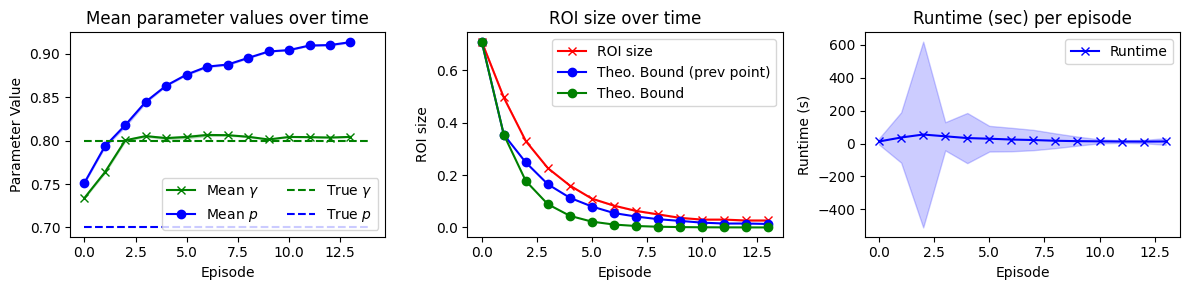

In [8]:
def make_diagnostics_data(diags):


    params = diags["parameter_means"]
    roi_sizes = diags["ROI_sizes"]
    runtimes = diags["runtime_secs"]
    theoretical_halfing_prev = [roi_size/2 for roi_size in roi_sizes[:-1]]
    theoretical_halfing_prev = [roi_sizes[0]] + theoretical_halfing_prev
    theoretical_halfing = [roi_sizes[0]/(2**i) for i in range(len(roi_sizes))]
    gammas = []
    ps = []

    for param in params:
        gammas.append(param.gamma)
        ps.append(param.p)

    return np.array(gammas), np.array(ps), np.array(roi_sizes), np.array(runtimes), np.array(theoretical_halfing_prev), np.array(theoretical_halfing)

gammas_1, ps_1, roi_sizes_1, runtimes_1, theoretical_halfing_prev_1, theoretical_halfing_1 = make_diagnostics_data(diags_1)
gammas_2, ps_2, roi_sizes_2, runtimes_2, theoretical_halfing_prev_2, theoretical_halfing_2 = make_diagnostics_data(diags_2)
gammas_3, ps_3, roi_sizes_3, runtimes_3, theoretical_halfing_prev_3, theoretical_halfing_3 = make_diagnostics_data(diags_3)

mean_gammas = np.mean([gammas_1, gammas_2, gammas_3], axis=0)
mean_ps = np.mean([ps_1, ps_2, ps_3], axis=0)
mean_roi_sizes = np.mean([roi_sizes_1, roi_sizes_2, roi_sizes_3], axis=0)
mean_runtimes = np.mean([runtimes_1, runtimes_2, runtimes_3], axis=0)
mean_theoretical_halfing_prev = np.mean([theoretical_halfing_prev_1, theoretical_halfing_prev_2, theoretical_halfing_prev_3], axis=0)
mean_theoretical_halfing = np.mean([theoretical_halfing_1, theoretical_halfing_2, theoretical_halfing_3], axis=0)

var_gammas = np.var([gammas_1, gammas_2, gammas_3], axis=0)
var_ps = np.var([ps_1, ps_2, ps_3], axis=0)
var_roi_sizes = np.var([roi_sizes_1, roi_sizes_2, roi_sizes_3], axis=0)
var_runtimes = np.var([runtimes_1, runtimes_2, runtimes_3], axis=0)
var_theoretical_halfing_prev = np.var([theoretical_halfing_prev_1, theoretical_halfing_prev_2, theoretical_halfing_prev_3], axis=0)
var_theoretical_halfing = np.var([theoretical_halfing_1, theoretical_halfing_2, theoretical_halfing_3], axis=0)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(12, 3))

ax[0].plot(mean_gammas, "g-x", label = "Mean $\gamma$")
ax[0].plot(mean_ps, "b-o", label="Mean $p$")
ax[0].fill_between(np.arange(0, len(gammas_1)), mean_gammas - 2*var_gammas, mean_gammas + 2*var_gammas, color="g", alpha=0.2)
ax[0].fill_between(np.arange(0, len(gammas_1)), mean_ps - 2*var_ps, mean_ps + 2*var_ps, color="b", alpha=0.2)
ax[0].set_xlabel("Episode")
ax[0].set_ylabel("Parameter Value")
ax[0].set_title("Mean parameter values over time")
ax[0].hlines(agent_gamma, 0, len(gammas_1), colors="g", linestyles="--", label="True $\gamma$")
ax[0].hlines(agent_p, 0, len(gammas_1), colors="b", linestyles="--", label="True $p$")
# ax[0].set_ylim(0.5, 0.95)
ax[0].legend(ncol=2)

ax[1].plot(mean_roi_sizes, "r-x", label="ROI size")
ax[1].plot(mean_theoretical_halfing_prev, "b-o", label="Theo. Bound (prev point)")
ax[1].plot(mean_theoretical_halfing, "g-o", label="Theo. Bound")
ax[1].fill_between(np.arange(0, len(mean_roi_sizes)), mean_roi_sizes - 2*var_roi_sizes, mean_roi_sizes + 2*var_roi_sizes, color="r", alpha=0.2)
ax[1].set_xlabel("Episode")
ax[1].set_ylabel("ROI size")
ax[1].set_title("ROI size over time")
ax[1].legend()

ax[2].plot(mean_runtimes, "b-x", label="Runtime")
ax[2].fill_between(np.arange(0, len(mean_roi_sizes)), mean_runtimes - 2*var_runtimes, mean_runtimes + 2*var_runtimes, color="b", alpha=0.2)
ax[2].set_xlabel("Episode")
ax[2].set_ylabel("Runtime (s)")
ax[2].set_title("Runtime (sec) per episode")
ax[2].legend()
plt.tight_layout()
plt.show()

In [9]:
obs = big_small_experiment["all_observations"][7]

NameError: name 'big_small_experiment' is not defined

In [ ]:
obs[0].R_true

tensor([ 0.0000,  0.0857,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.0806,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0845,  0.0912,  0.1076,
         0.1297,  0.0000,  1.0000, -0.0954,  0.0000,  0.0000,  0.0000,  0.1526,
         3.0000])

In [ ]:
pos_inference = PosteriorInference(expert_trajectories=[big_small_experiment["all_observations"][7]],
                                    resolution = 15,
                                    min_gamma = 0.5,
                                    max_gamma = 0.99,
                                    min_p = 0.5,
                                    max_p = 0.99)

### Calculate Posterior Distribution.

In [ ]:
pos_inference.calculate_posterior(num_episodes=1)

Calculate distribution of episode 0, e.g. the prior distribution.
Calculate distribution of episode 1.


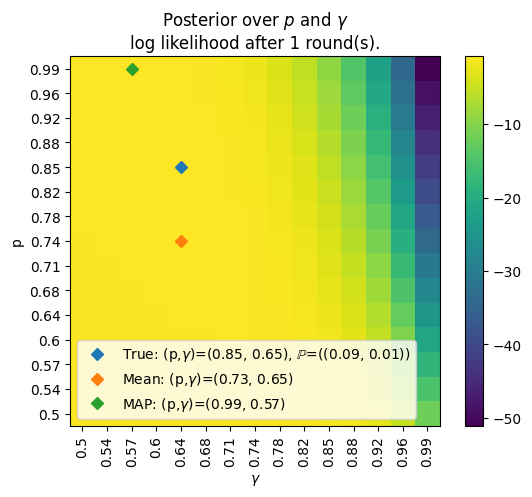

In [ ]:
pos_inference.plot_posterior(episode=1, param_values=true_params)

### Make inference.

In [ ]:
pos_inference.plot_statistics_over_time(episode=4, true_params=true_params)

AssertionError: Posterior Distribution for this episode does not exist yet. Only the following episodes exist: dict_keys(['episode=0', 'episode=1'])

In [ ]:
pos_inference.plot_posterior(episode=10, true_params=true_params)